# CNN - Cat/Dog

In [1]:
# importing required packages
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

### Data Preprocessing

In [2]:
# preprocessing train set
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set = train_datagen.flow_from_directory('dataset/training_set', target_size=(64, 64), 
                                                 batch_size=32, class_mode='binary')

Found 8000 images belonging to 2 classes.


In [3]:
# preprocessing test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.


### Build CNN

#### Initialising CNN

In [4]:
cnn = tf.keras.models.Sequential()

#### Convolution

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

#### Pooling

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Adding second convolution layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Flattening

In [8]:
cnn.add(tf.keras.layers.Flatten())

#### Full Connection

In [9]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#### Output Layer

In [10]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Training CNN

#### Compiling CNN

In [11]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

#### Traning CNN

In [13]:
cnn.fit(x=training_set, validation_data=test_set, epochs=30)

Epoch 1/30
250/250 [==============================] - 29s 107ms/step - loss: 0.6811 - accuracy: 0.5591 - val_loss: 0.6791 - val_accuracy: 0.5830
Epoch 2/30
250/250 [==============================] - 26s 104ms/step - loss: 0.6137 - accuracy: 0.6650 - val_loss: 0.5815 - val_accuracy: 0.6980
Epoch 3/30
250/250 [==============================] - 26s 103ms/step - loss: 0.5806 - accuracy: 0.6864 - val_loss: 0.5462 - val_accuracy: 0.7275
Epoch 4/30
250/250 [==============================] - 26s 103ms/step - loss: 0.5422 - accuracy: 0.7260 - val_loss: 0.5497 - val_accuracy: 0.7340
Epoch 5/30
250/250 [==============================] - 26s 104ms/step - loss: 0.5190 - accuracy: 0.7436 - val_loss: 0.5182 - val_accuracy: 0.7515
Epoch 6/30
250/250 [==============================] - 26s 103ms/step - loss: 0.5060 - accuracy: 0.7490 - val_loss: 0.5258 - val_accuracy: 0.7405
Epoch 7/30
250/250 [==============================] - 26s 104ms/step - loss: 0.4897 - accuracy: 0.7623 - val_loss: 0.4949 - val_ac

### Making Single Prediction

In [14]:
import numpy as np
from keras.preprocessing import image

In [15]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

In [16]:
result = cnn.predict(test_image)

In [17]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [18]:
def get_prediction(result):
    if result[0][0] == 1:
        prediction = 'dog'
    else:
        prediction = 'cat'
    return prediction

In [19]:
print(get_prediction(result))

dog


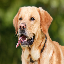

In [20]:
# view image
image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size=(64, 64)) 

In [21]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)

In [22]:
print(get_prediction(result))

cat


In [23]:
result

array([[0.]], dtype=float32)

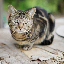

In [24]:
image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size=(64, 64))